In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Load the dataset
data = pd.read_csv("/content/ToyotaCorolla - MLR.csv")

# EDA
print("Dataset Info:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB

Summary Statistics:
               Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     

In [3]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


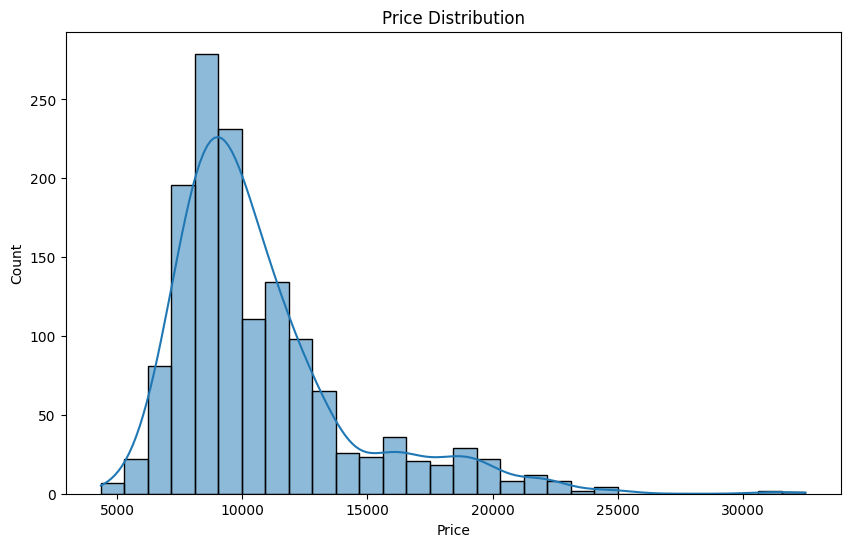

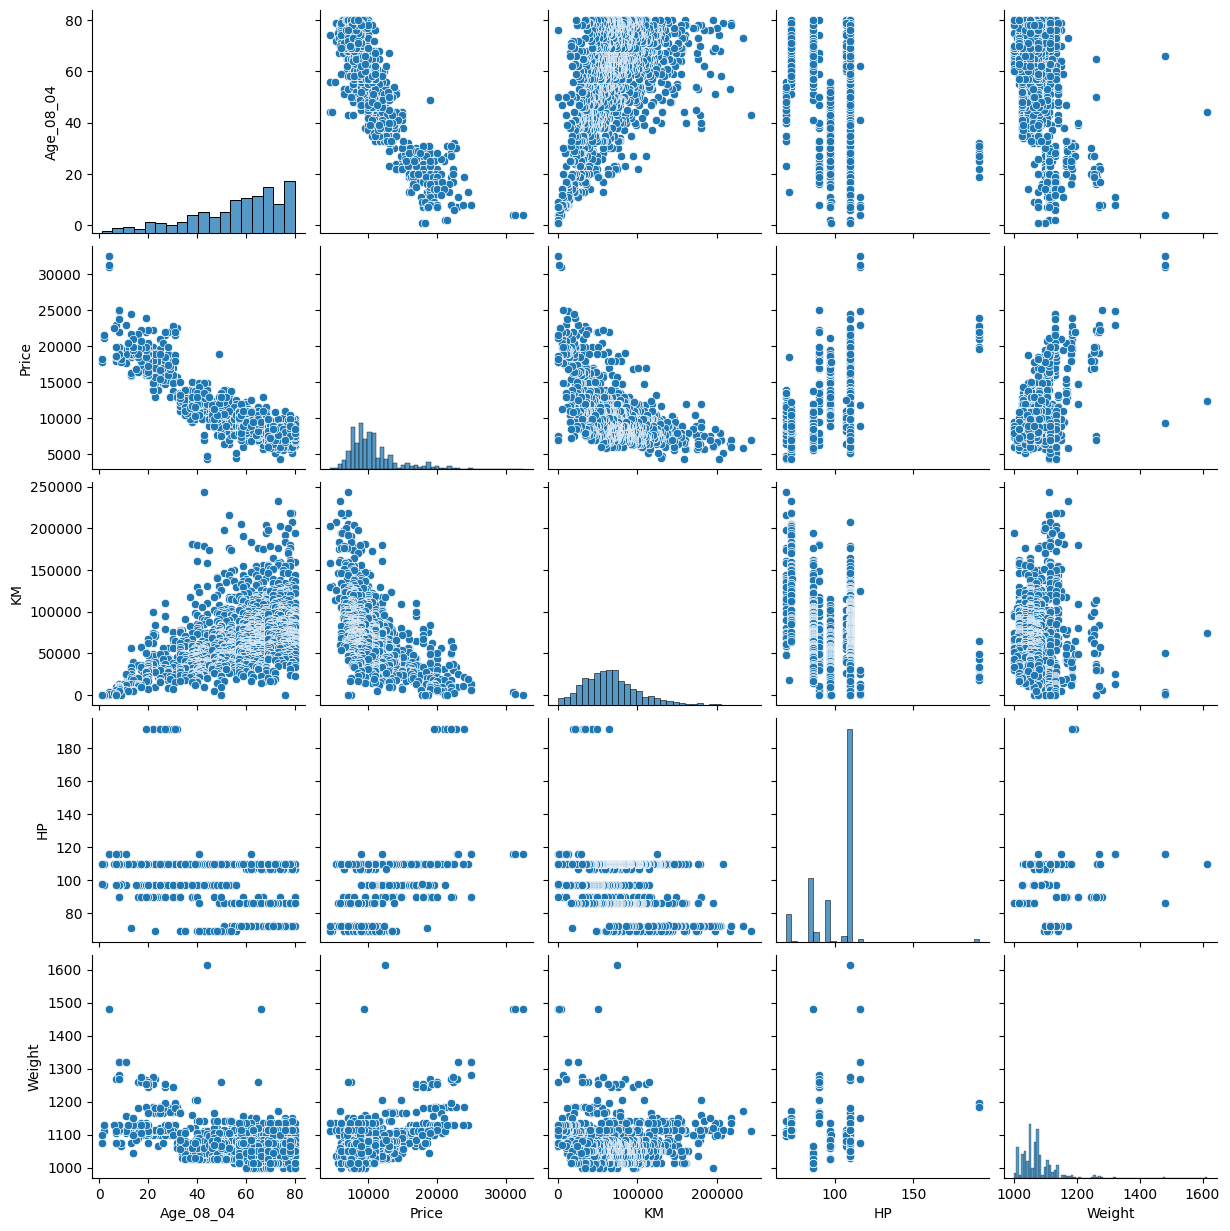

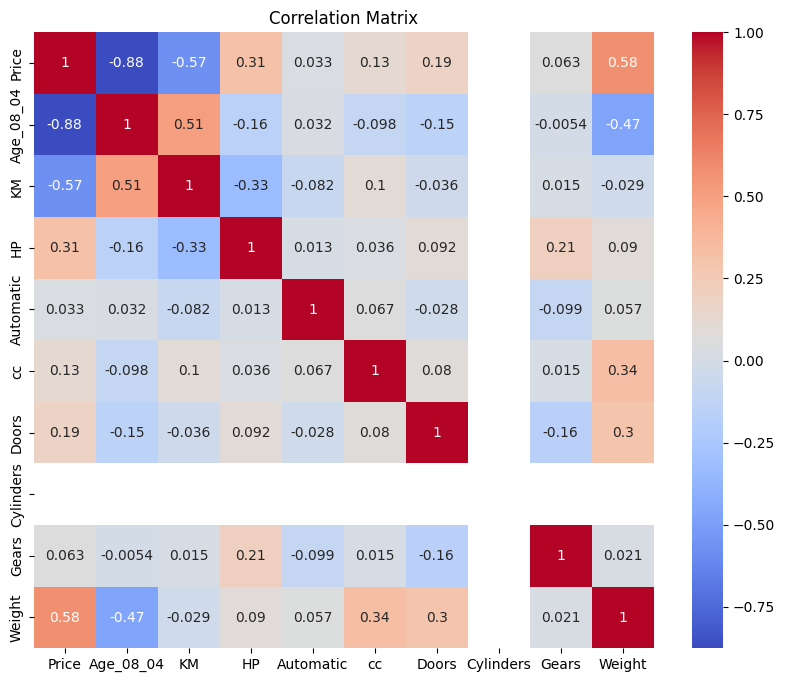

In [16]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

sns.pairplot(data[['Age_08_04','Price', 'KM', 'HP', 'Weight']])
plt.show()

plt.figure(figsize=(10, 8))
# Include only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [22]:
# Preprocessing
categorical_features = ['Fuel_Type', 'Automatic']
# Adjust numerical_features to match actual column names in the dataframe
numerical_features = ['Age_08_04','KM', 'HP', 'cc', 'Doors', 'Weight']


In [23]:
# Handling categorical variables and scaling numerical features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(), categorical_features)
])

In [24]:
# Splitting the data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build models
# Linear Regression Pipeline
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [25]:
# Model evaluation
print("Linear Regression R2 Score:", r2_score(y_test, y_pred))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))


Linear Regression R2 Score: 0.8332952678447363
Linear Regression MSE: 2224306.040393545


In [26]:
# Ridge Regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression R2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression R2 Score: 0.8338162301220333
Ridge Regression MSE: 2217354.9507320365


In [27]:
# Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression R2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

Lasso Regression R2 Score: 0.8333117427900768
Lasso Regression MSE: 2224086.2186766546


In [28]:
# Assumptions and discussion
print("\nAssumptions:\n")
print("1. The relationship between features and target is linear.")
print("2. There is no severe multicollinearity among predictors (checked via heatmap).")
print("3. Residuals of the model are assumed to be normally distributed.")


Assumptions:

1. The relationship between features and target is linear.
2. There is no severe multicollinearity among predictors (checked via heatmap).
3. Residuals of the model are assumed to be normally distributed.
